In [ ]:
!pip install nltk scikit-learn pandas numpy seaborn

Loading breast cancer dataset...

Performing K-means clustering...

Generating visualizations...


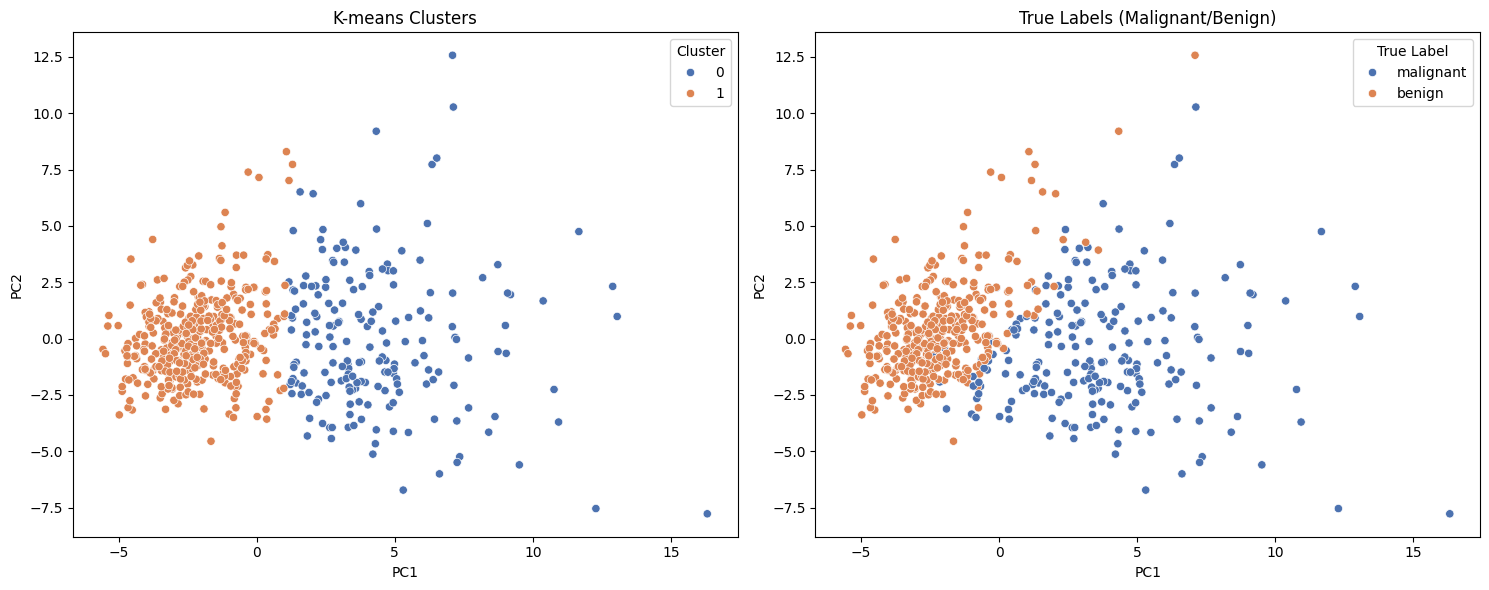


Analyzing cluster characteristics...

Cluster 0:
Size: 188 samples
Top features and their mean values:
- worst area: 1457.36
- mean area: 997.63
- worst perimeter: 143.44
- mean perimeter: 116.70
- area error: 77.32

Cluster 1:
Size: 381 samples
Top features and their mean values:
- worst area: 595.98
- mean area: 485.77
- worst perimeter: 89.41
- mean perimeter: 79.77
- worst texture: 24.11

Evaluating clustering performance...

Silhouette Score: 0.345

Cluster vs True Labels Distribution:
       malignant  benign
row_0                   
0            175      13
1             37     344


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

class CancerClustering:
    def __init__(self, n_clusters=2, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

    def load_data(self):
        """
        Load the breast cancer dataset
        """
        data = load_breast_cancer()
        self.feature_names = data.feature_names
        self.target_names = data.target_names

        # Convert to DataFrame for easier handling
        self.df = pd.DataFrame(data.data, columns=self.feature_names)
        self.true_labels = data.target
        return self.df

    def fit_transform(self, data=None):
        """
        Fit the model and transform the input data
        """
        if data is None:
            data = self.df

        # Scale the features
        self.scaled_features = self.scaler.fit_transform(data)

        # Fit K-means
        self.cluster_labels = self.kmeans.fit_predict(self.scaled_features)

        return self.cluster_labels

    def visualize_clusters(self):
        """
        Visualize the clusters using PCA
        """
        # Reduce dimensions to 2D using PCA
        pca = PCA(n_components=2, random_state=self.random_state)
        reduced_features = pca.fit_transform(self.scaled_features)

        # Create DataFrame for plotting
        df_plot = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
        df_plot['Cluster'] = self.cluster_labels
        df_plot['True Label'] = [self.target_names[label] for label in self.true_labels]

        # Create subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Plot clustered data
        sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster',
                       palette='deep', ax=ax1)
        ax1.set_title('K-means Clusters')

        # Plot true labels
        sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='True Label',
                       palette='deep', ax=ax2)
        ax2.set_title('True Labels (Malignant/Benign)')

        plt.tight_layout()
        plt.show()

    def get_cluster_characteristics(self):
        """
        Get the characteristics of each cluster
        """
        cluster_stats = {}

        for i in range(self.n_clusters):
            # Get samples in this cluster
            cluster_samples = self.df[self.cluster_labels == i]

            # Calculate mean values for each feature
            means = cluster_samples.mean()

            # Get top 5 most distinctive features
            sorted_features = means.sort_values(ascending=False)
            top_features = sorted_features.head(5)

            cluster_stats[f'Cluster {i}'] = {
                'size': len(cluster_samples),
                'top_features': top_features.to_dict()
            }

        return cluster_stats

    def evaluate_clustering(self):
        """
        Evaluate the clustering using silhouette score and compare with true labels
        """
        silhouette = silhouette_score(self.scaled_features, self.cluster_labels)

        # Create a crosstab of cluster labels vs true labels
        comparison = pd.crosstab(
            self.cluster_labels,
            self.true_labels,
            values=[1] * len(self.true_labels),
            aggfunc='count'
        )
        comparison.columns = [self.target_names[i] for i in range(len(self.target_names))]

        return {
            'silhouette_score': silhouette,
            'cluster_vs_true_labels': comparison
        }

def main():
    # Initialize clustering
    clustering = CancerClustering(n_clusters=2)

    # Load and process data
    print("Loading breast cancer dataset...")
    clustering.load_data()

    # Perform clustering
    print("\nPerforming K-means clustering...")
    labels = clustering.fit_transform()

    # Visualize results
    print("\nGenerating visualizations...")
    clustering.visualize_clusters()

    # Get cluster characteristics
    print("\nAnalyzing cluster characteristics...")
    characteristics = clustering.get_cluster_characteristics()
    for cluster, stats in characteristics.items():
        print(f"\n{cluster}:")
        print(f"Size: {stats['size']} samples")
        print("Top features and their mean values:")
        for feature, value in stats['top_features'].items():
            print(f"- {feature}: {value:.2f}")

    # Evaluate clustering
    print("\nEvaluating clustering performance...")
    evaluation = clustering.evaluate_clustering()
    print(f"\nSilhouette Score: {evaluation['silhouette_score']:.3f}")
    print("\nCluster vs True Labels Distribution:")
    print(evaluation['cluster_vs_true_labels'])

if __name__ == "__main__":
    main()